#Diferencias finitas

El método de diferencias finitas es un método numérico para aproximar la derivada de funciones. Se usa en la solución de ecuaciones diferenciales y en problemas de optimización, cuando la expresión analítica no está disponible o es muy difícil de obtener.

La idea de base es comparar el valor de la función en el punto donde se quiere evaluar la derivada con el valor de la función en puntos "cercanos". Esto está basado en la definición de la derivada de la función $f(x)$, como el límite de $\Delta x\to 0$ del cociente de diferencias:
$$
f'(x) = \lim_{{\Delta x} \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

Diferencias finitas aproxima este límite usando un valor "chico" pero finito de $\Delta x$. El valor de $\Delta x$ resulta en general de una competencia entre la precisión que se obtiene de la derivada y cuestiones prácticas asociadas a la representación de los números en la computadora.
Cuanto más chico sea el $\Delta x$, más precisa va a ser la aproximación de la derivada, pero los errores asociados a la precisión finita de los números se pueden hacer muy importantes.

En la práctica, encontrar el valor más adecuado de $\Delta x$ requiere probar más de un valor y depende en general de la función y del punto en que se quiere evaluar la derivada.

Veamos el cálculo numérico de la derivada de $f(x)=1+x^4$,
cuya derivada analítica es $f'(x)=4 x^3$.

En el siguiente código se calcula la derivada de $f(x)$ en $x_0$ usando diferencias finitas y se grafica la función junto con dos rectas que pasan por el punto  $(x_0,f(x_0))$. La pendiente de las rectas está dada por $f'(x_0)$ calculada analíticamente y usando diferencias finitas. Se espera que las rectas sean tangentes a $f(x)$ en $x_0$. En el código se usa $h$ en lugar de $\Delta x$.


In [5]:
# @title
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interactive


# Derivada numérica de f en el punto x usando una diferencia finita h

def derivada(f, x, h): #derivada hacia adelante O(h)
    return (f(x+h) - f(x))/h

# Función a derivar
def f1(x):
  return 1 + x**4

# Derivada analítica de f1
def f1p(x):
  return 4 * x**3

# Función para hacer una gráfico interactivo
def to_plot(x0, h):

  # Valores de x para graficar, 1000 valores equiespaciados entre 0 y 2
  x = np.linspace(0,2,num=1000)

  # Rango del eje y del gráfico
  plt.ylim(0,15)

  # Función f(x)
  plt.plot(x, f1(x), lw=1,color='red', label="$f(x)$")
  # Recta con pendiente dada por la derivada de diferencias finitas
  plt.plot(x, f1(x0) + derivada(f1,x0,h)*(x-x0), lw=1,color='blue', label="tangente usando $\\frac{f(x+h)-f(x)}{h}$")
  # Recta con pendiente dada por la derivada analítica
  plt.plot(x, f1(x0) + f1p(x0)*(x-x0), lw=1,color='green', label="tangente usando $\\frac{df}{dx}$ analítica")
  # Para mostrar el punto que se usa para calcular la diferencia finita
  plt.arrow(x0, f1(x0), h, 0, head_width=0.01, length_includes_head= True)
  plt.arrow(x0+h, f1(x0), 0 , f1(x0+h)-f1(x0),ls = "--")

  plt.legend(loc ="upper left")
  plt.xlabel("$x$")
  plt.ylabel("$f(x)$")
  plt.title('f(x) y rectas tangentes')
  plt.grid()
  plt.show()

# gráfico interactivo
interactive(to_plot,x0=(0,2,0.1),h=(0.01,0.6,0.01))

interactive(children=(FloatSlider(value=1.0, description='x0', max=2.0), FloatSlider(value=0.3, description='h…

# Precisión numérica
La computadora almacena los números en representación binaria, utilizando un número finito de bits (típicamente 32 o 64 bits).

Veamos un ejemplo:



In [ ]:
x = 0.25
#imprimimos 30 decimales
print(format(x, ".30f"))

x = 0.1
#imprimimos 30 decimales
print(format(x, ".30f"))


0.250000000000000000000000000000
0.100000000000000005551115123126


* ¿Porqué tenemos un error diferente en los dos casos que se muestran $x=0.1$ y $x=0.25$?
* ¿Cuántos bits está usando para representar estos números?




In [ ]:
# @title
import sys

print("Valor más alto posible:", sys.float_info.max)
print("Valor positivo más chico posible:", sys.float_info.min)
print("Número de dígitos decimales que se representan de manera fiel:", sys.float_info.dig)
print("Épsilon (valor más chico que le podemos sumar a 1.0 y que de un número distinto):", sys.float_info.epsilon)


Valor más alto posible: 1.7976931348623157e+308
Valor positivo más chico posible: 2.2250738585072014e-308
Número de dígitos decimales que se representan de manera fiel: 15
Épsilon (valor más chico que le podemos sumar a 1.0 y que de un número distinto): 2.220446049250313e-16


Si usamos un $h$ menor al $\epsilon$ (épsilon), que es el valor más chico que le podemos sumar a $1.0$ y que de un número distinto, no va a tener mucho sentido la diferencia finita.

Un criterio empírico usual es usar $h\sim \sqrt{\epsilon}$, pero no es una solución universal.
* ¿Cuál es el error que estamos cometiendo? ¿Cómo depende de $h$?

Una opción, si el caso lo requiere, es trabajar con precisión arbitraria, pero para la mayoría de los problemas no hace falta usarlas. A mayor número de decimales, mayor costo computacional.

In [ ]:
# @title
# Librería de precisión arbitraria
from mpmath import mp

x = 0.1
#imprimimos 30 decimales
print(format(x, ".30f"))

print("Ahora eligiendo una precisión mayor:")

mp.dps = 27 #precisión determinada por el número de decimales

mp.pretty = False
print(mp.nstr(mp.mpmathify('0.1'),29))

0.100000000000000005551115123126
Ahora eligiendo una precisión mayor:
0.10000000000000000000000000001


#Error en la derivadas
Para estimar el error de usar un $h$ finito en diferencias finitas y la dependencia del error con $h$, vamos a partir de la expansión en serie de Taylor de la función $f(x)$ alrededor del punto $x$

$$f(x + h) = f(x) + h f'(x) + \frac{h^2}{2!} f''(x) + \frac{h^3}{3!} f'''(x) + \ldots$$

donde $f'(x)$, $f''(x)$, etc., son la derivada primera, segunda, etc. de  $f$ evaluadas en $x$ y $h$ es un incremento pequeño.

1. Derivada adelantada (*forward*)

Si despreciamos términos de $h^2$ y superiores, tenemos la aproximación:

$$f(x + h) \approx f(x) + h f'(x) +\mathcal{O}(h^2)$$

Acá $\mathcal{O}(h^2)$ significa que los términos despreciados están dominados por un término  proporcional a $h^2$ para $h$ suficientemente chico.

Reordenando tenemos la siguiente aproximación para $f'(x)$

$$f'(x) \approx \frac{f(x + h) - f(x)}{h} + \mathcal{O}(h)$$
Acá el error es ahora $\mathcal{O}(h)$ porque dividimos toda la expresión por $h$.

2. Diferencia hacia atrás (backward):

Podemos usar el mismo procedimiento pero considerando la expansión de Taylor de  $f(x - h)$:

$$f(x-h) = f(x) - h f'(x) + \frac{h^2}{2!} f''(x) - \frac{h^3}{3!} f'''(x) \ldots$$

y haciendo la misma aproximación que con la derivada adelantada llegamos a

$$f(x-h) = f(x) - h f'(x) +\mathcal{O}(h^2)$$

Reordenando tenemos

$$f'(x) \approx \frac{f(x) - f(x - h)}{h}+\mathcal{O}(h)$$

3. Diferencia centrada

La diferencia central se puede obtener haciendo la diferencia entre las expansiones de Taylor de $f(x - h)$ y de $f(x + h)$:

$$f(x + h) - f(x - h) = 2h f'(x) + \frac{2h^3}{3!} f'''(x) + \ldots$$

Vemos en esta expresión que se cancela el término cuadrático en $h$ que acompaña a la derivada segunda. Dividiendo por $2h$ tenemos


$$f'(x) \approx \frac{f(x + h) - f(x - h)}{2h} +\mathcal{O}(h^2)$$

que es una aproximación de orden superior en $h$ de la derivada.

* ¿Cómo se podría hacer para obtener una aproximación de orden mayor?

En el siguiente código calculamos diferentes aproximaciones de la derivada de una función (derivada avanzada, centrada y centrada de orden superior). También calculamos la derivada simbólica usando ```sympy``` y la usamos para calcular el error de las diferentes aproximaciones.

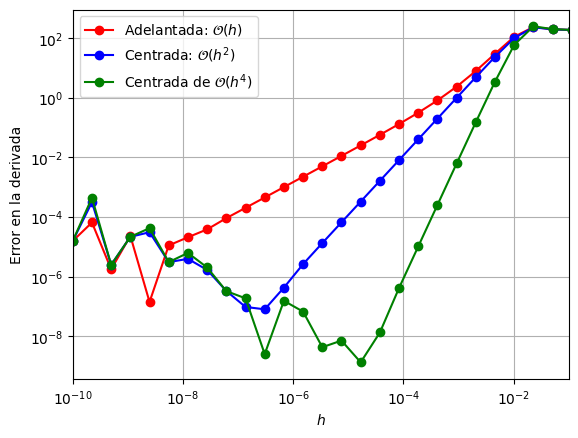

In [2]:
# @title
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, lambdify, sin, diff

x = symbols('x')

# Definimos la función y su derivada simbólica
y = sin(x**3)
yprime = diff(y, x)

#Esto permite evaluar las funciones "y" e "yprime"
f1 = lambdify(x, y)
f1p = lambdify(x, yprime)


#derivadas numéricas
def derivadaC2(f, x, h): #derivada central O(h^2)
    return (f(x+h) - f(x-h))/(2*h)

def derivadaC4(f, x, h): # derivada centrada  O(h^4)
    return (-f(x+2*h) + 8*f(x+h) - 8*f(x-h) + f(x-2*h))/(12*h)

def derivada1(f, x, h):  #derivada avanzada O(h)
    return (f(x) - f(x-h))/(h)

# vamos a evaluar en x_val
x_val = 8.0

#valores de la diferencia h en escala logarítmica
h = np.logspace(-10,0.1,num=30, base=10)

#errores absolutos de las diferentes aproximaciones comparadas con la expresión analítica

errorC4 = np.abs(f1p(x_val)-derivadaC4(f1, x_val,h))
errorC2 = np.abs(f1p(x_val)-derivadaC2(f1, x_val,h))
error1 = np.abs(f1p(x_val)-derivada1(f1, x_val,h))

plt.loglog(h, error1, 'o-',  color='red', label="Adelantada: $\\mathcal{O}(h)$")
plt.loglog(h, errorC2, 'o-',  color='blue', label="Centrada: $\\mathcal{O}(h^2)$")
plt.loglog(h, errorC4, 'o-',  color='green', label="Centrada de $\\mathcal{O}(h^4)$")
plt.xlim(10**(-10),0.1)
plt.xlabel("$h$")
plt.ylabel("Error en la derivada")
plt.legend(loc ="upper left")
plt.grid()
plt.show()




* ¿A qué corresponde una recta en un gráfico $\log$-$\log$?
* ¿Qué pendiente tienen los segmentos aproximadamente rectos en el gráfico?
* ¿Cuántas evaluaciones de la función realiza cada método?
* ¿Depende, en general, el error en la derivada del punto de evaluación?
* ¿Es exacto el valor calculado usando la expresión analítica?